<a href="https://colab.research.google.com/github/kyjness/personal/blob/main/2%EC%B0%A8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8A%A4%ED%83%80%EB%B2%85%EC%8A%A4_%EA%B0%90%EC%A0%95%EB%A6%AC%EB%B7%B0_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#스타벅스 감정리뷰 예측

##1) 데이터 로드하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
# 리뷰 데이터 로드
df= pd.read_csv('/content/drive/MyDrive/쿠글/2차 프로젝트 데이터/reviews_data.csv')
df.head(10)

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",1.0,We had to correct them on our order 3 times. T...,['No Images']
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",1.0,I have tried Starbucks several different times...,['No Images']
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",1.0,Starbucks near me just launched new fall foods...,['No Images']
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",1.0,"I ordered online for the Reisterstown Rd, St T...",['No Images']
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",1.0,Staff at the Smythe St. Superstore location in...,['No Images']


In [4]:
# 리뷰 텍스트와 평점 추출
total_data = df[['Rating', 'Review']]
print('전체 리뷰 개수 :',len(total_data)) # 전체 리뷰 개수 출력

전체 리뷰 개수 : 850


In [5]:
total_data[:5]

,Rating,Review
0,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,5.0,** at the Starbucks by the fire station on 436...
2,5.0,I just wanted to go out of my way to recognize...
3,5.0,Me and my friend were at Starbucks and my card...
4,5.0,I’m on this kick of drinking 5 cups of warm wa...


##2) 데이터 정제

In [6]:
import numpy as np

label 열 생성

In [7]:
total_data['label'] = np.select([total_data.Rating > 3], [1], default=0)
total_data[:10]

<ipython-input-7-8f21fca11aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data['label'] = np.select([total_data.Rating > 3], [1], default=0)


,Rating,Review,label
0,5.0,Amber and LaDonna at the Starbucks on Southwes...,1
1,5.0,** at the Starbucks by the fire station on 436...,1
2,5.0,I just wanted to go out of my way to recognize...,1
3,5.0,Me and my friend were at Starbucks and my card...,1
4,5.0,I’m on this kick of drinking 5 cups of warm wa...,1
5,1.0,We had to correct them on our order 3 times. T...,0
6,1.0,I have tried Starbucks several different times...,0
7,1.0,Starbucks near me just launched new fall foods...,0
8,1.0,"I ordered online for the Reisterstown Rd, St T...",0
9,1.0,Staff at the Smythe St. Superstore location in...,0


In [8]:
total_data['Rating'].nunique(), total_data['Review'].nunique(), total_data['label'].nunique()

(5, 814, 2)

중복 제거

In [9]:
total_data.drop_duplicates(subset=['Review'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 814


<ipython-input-9-e0153c3b132b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data.drop_duplicates(subset=['Review'], inplace=True) # reviews 열에서 중복인 내용이 있다면 중복 제거


null값 제거

In [10]:
total_data.dropna(inplace=True) #null값 제거
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 704


<ipython-input-10-b6010885721f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_data.dropna(inplace=True) #null값 제거


train,test 데이터 나누기

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))

훈련용 리뷰의 개수 : 528
테스트용 리뷰의 개수 : 176


레이블의 분포 확인

<Axes: xlabel='label'>

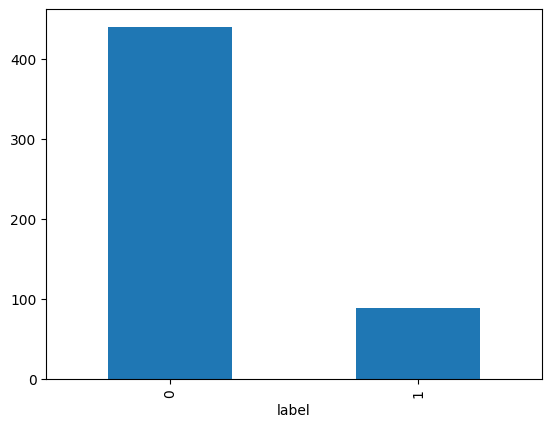

In [14]:
train_data['label'].value_counts().plot(kind = 'bar')

In [15]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0    440
1      1     88


영어와 공백을 제외하고 모두 제거

In [16]:
#영어와 공백을 제외하고 모두 제거
train_data['Review'] = train_data['Review'].str.replace("[^a-zA-Z ]", "", regex=True)
train_data['Review'].replace('', np.nan, inplace=True)  # 공백은 Null 값으로 변경
print(train_data.isnull().sum())
print('전처리 후 테스트용 샘플의 개수 :',len(train_data))

Rating    0
Review    0
label     0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 528


<ipython-input-16-96305158ff2c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Review'].replace('', np.nan, inplace=True)  # 공백은 Null 값으로 변경


In [17]:
test_data['Review'] = test_data['Review'].str.replace("[^a-zA-Z ]","", regex=True)
test_data['Review'].replace('', np.nan, inplace=True)
print(test_data.isnull().sum())
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

Rating    0
Review    0
label     0
dtype: int64
전처리 후 테스트용 샘플의 개수 : 176


<ipython-input-17-92ed7059d24f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Review'].replace('', np.nan, inplace=True)


##3) 토큰화

spaCy:자연어 처리를 위한 Python 기반 라이브러리로, 빠르고 효율적인 NLP 작업을 지원

In [18]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 81.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [19]:
import spacy

nlp = spacy.load("en_core_web_sm")
text= 'This product is completely disappointing. The quality is poor, it doesn\'t work as advertised, and the customer service was unhelpful when I reached out. I wouldn\'t recommend this to anyone.'
doc = nlp(text)
tokens = [token.text for token in doc]
print(tokens)

['This', 'product', 'is', 'completely', 'disappointing', '.', 'The', 'quality', 'is', 'poor', ',', 'it', 'does', "n't", 'work', 'as', 'advertised', ',', 'and', 'the', 'customer', 'service', 'was', 'unhelpful', 'when', 'I', 'reached', 'out', '.', 'I', 'would', "n't", 'recommend', 'this', 'to', 'anyone', '.']


In [20]:
stopwords = ['the', 'i', 'to', 'and', 'a', 'my', 'starbucks', 'of', 'was', 'in', 'it', 'for', 'that', 'is', 'they', 'me', 'at', 'on', 'have', 'coffee',
'this', 'with', 'but', 'you', 'she', 'are', 'so', 'had', 'be',
'when', 'their', 'customer', 'get', 'one', 'there', 'drink',
'as', 'store', 'service', 'we', 'time', 'from', 'all', 'or', 'about', 'he']

In [21]:
# spaCy 기반 토큰화 함수 정의
def spacy_tokenize(text):
    doc = nlp(text)  # 텍스트 분석
    return [token.text for token in doc]  # 토큰화 결과 반환

In [22]:
train_data['tokenized'] = train_data['Review'].apply(spacy_tokenize)
train_data['tokenized'] = train_data['tokenized'].apply(lambda x: [item.lower() for item in x if item.lower() not in stopwords])
test_data['tokenized'] = test_data['Review'].apply(spacy_tokenize)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item.lower() for item in x if item.lower() not in stopwords])

##4) 단어와 길이 분포 확인

Counter: Python의 collections 모듈에서 제공하는 클래스

 리스트, 문자열, 튜플 등의 데이터에서 요소(항목)의 빈도수(횟수)를 계산하여 딕셔너리 형태로 반환

Counter의 주요 특징

-빈도수 계산:
데이터의 각 항목이 몇 번 등장했는지 쉽게 확인 가능.

-딕셔너리 형태로 반환:
항목을 키(key)로, 빈도수를 값(value)으로 저장.

-가장 빈도가 높은 항목 추출:
most_common() 메서드를 사용하여 빈도가 높은 항목을 쉽게 확인 가능.

In [23]:
from collections import Counter

In [24]:
negative_words = np.hstack(train_data[train_data.label == 0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label == 1]['tokenized'].values)

In [25]:
negative_words = [word for word in negative_words if word.strip()]  # 공백 제거
negative_word_count = Counter(negative_words)
print(negative_word_count.most_common(20))

[('not', 368), ('nt', 285), ('do', 193), ('no', 154), ('did', 144), ('out', 143), ('if', 142), ('said', 141), ('order', 130), ('like', 129), ('up', 129), ('go', 128), ('her', 121), ('would', 116), ('card', 115), ('went', 112), ('just', 111), ('very', 110), ('because', 107), ('were', 106)]


In [26]:
positive_words = [word for word in positive_words if word.strip()]  # 공백 제거
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

[('always', 43), ('not', 35), ('good', 31), ('very', 30), ('great', 30), ('nt', 25), ('like', 25), ('been', 21), ('more', 20), ('order', 19), ('its', 19), ('has', 19), ('food', 17), ('drinks', 16), ('do', 15), ('go', 15), ('staff', 14), ('could', 14), ('out', 14), ('would', 14)]


긍정/부정 리뷰 평규 길이 시각화

In [28]:
import matplotlib.pyplot as plt

긍정 리뷰의 평균 길이 : 33.28409090909091
부정 리뷰의 평균 길이 : 56.55227272727273


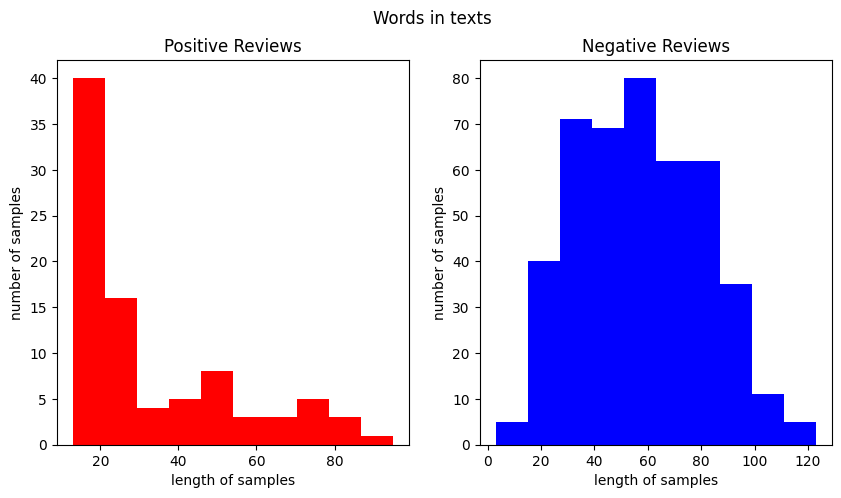

In [29]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [30]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

##5) 정수 인코딩

Tokenizer: 텍스트 데이터를 머신러닝 모델에 입력하기 전에 숫자로 변환하거나, 단어/문장을 나누는 작업(토큰화)을 수행하는 도구

Tokenizer의 역할

-토큰화 (Tokenization):

문장을 단어 단위 또는 문자 단위로 분리.
예: "This is a test." → ['This', 'is', 'a', 'test'].

-단어를 숫자로 매핑 (Encoding):

텍스트 데이터를 모델에 입력할 수 있도록 숫자 인덱스로 변환.
예: ['This', 'is', 'a', 'test'] → [1, 2, 3, 4].

-패딩 (Padding):

시퀀스의 길이를 동일하게 맞추기 위해 부족한 길이를 0으로 채움.
예: [[1, 2], [3, 4, 5]] → [[1, 2, 0], [3, 4, 5]].

-필터링:

자주 등장하지 않는 단어를 제거하거나, 특정 길이 이상의 텍스트를 잘라냄.

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [32]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [33]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 4542
등장 빈도가 1번 이하인 희귀 단어의 수: 2260
단어 집합에서 희귀 단어의 비율: 49.75781594011448
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.125988781820796


In [34]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2284


In [35]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [36]:
print(X_train[:3])

[[1556, 427, 14, 385, 1557, 16, 8, 109, 33, 1, 193, 1, 206, 554, 1, 50, 30, 121, 1558, 71, 555, 9, 866, 5, 1, 611, 1, 310, 769, 458, 1, 9, 207, 290, 1223, 1, 61, 16, 4, 405, 1, 122, 7, 1, 1, 331, 1030, 141, 50, 19, 612, 33, 33, 556, 5, 4, 428, 406, 10, 459, 1, 1559, 21, 1], [41, 98, 142, 18, 1560, 57, 98, 386, 311, 11, 20, 3, 1, 208, 103, 4, 1031, 1032, 429, 109, 248, 194, 1, 90, 557, 62, 14, 343, 30, 3, 1033, 142, 18, 460, 2, 135, 1561, 1], [176, 2, 461, 154, 160, 104, 3, 684, 61, 67, 63, 29, 177, 63, 227, 58, 1224, 110, 91, 1, 103, 867, 76, 1562, 79, 39, 29, 430, 33, 154, 45, 209, 39, 82, 33, 387, 67, 1225, 59, 462, 1, 387, 63, 461, 154, 160, 1, 39, 161, 33, 154, 503, 40, 558, 431, 186, 1562, 79, 86, 63, 235, 461, 154, 160, 195, 31, 388, 63, 235, 5, 4, 1, 50, 8, 1032, 1563, 1, 121, 1, 1226]]


In [37]:
print(X_test[:3])

[[327, 608, 160, 84, 3, 145, 48, 24, 157, 1, 1, 348, 1, 1, 257, 1718, 542, 1037, 60], [41, 2, 1, 337, 3, 1, 935, 1, 27, 1402, 527, 266, 14, 549, 1, 60, 195, 48, 3, 63, 593, 2223, 430, 504, 387, 38, 1, 107, 181, 342, 738, 1, 1, 3, 387, 72, 405, 14, 659, 185, 211, 3, 54, 5, 3, 636, 52, 1426, 1, 9, 109, 527, 5, 3, 344, 182, 63, 28], [86, 44, 74, 251, 1, 1, 123, 2, 12, 1, 118, 1525, 86, 1381, 935, 114, 1, 551, 114, 1, 139, 1727, 883, 1, 1592, 1962, 2, 1198, 172, 25, 1315, 171, 62, 14, 1249, 110, 1962, 1, 404, 582, 1, 55]]


##6) 패딩

pad_sequences: TensorFlow/Keras의 텍스트 전처리 도구로, 길이가 다른 시퀀스(sequence)를 동일한 길이로 맞춰주는 데 사용됩니다.

pad_sequences의 주요 기능

-시퀀스의 길이 통일:

길이가 다른 시퀀스를 특정 길이로 맞춤.
짧은 시퀀스는 **패딩(padding)**을 추가해 길이를 늘림.
긴 시퀀스는 잘라냄(truncating).

-패딩 위치 선택:

앞쪽(pre) 또는 뒤쪽(post)에 패딩을 추가.

-패딩 값 지정:

패딩에 사용할 값을 지정 (기본값: 0).

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

리뷰의 최대 길이 : 123
리뷰의 평균 길이 : 52.67424242424242


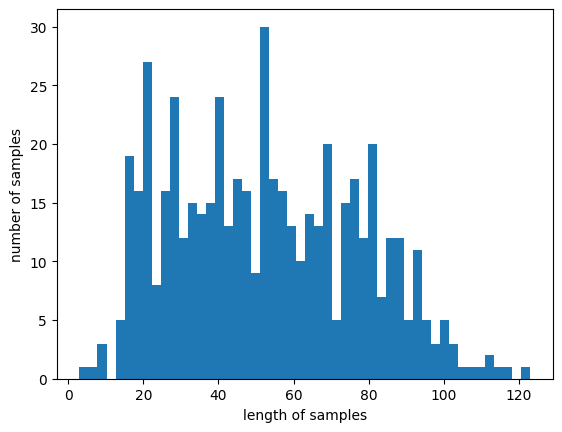

In [43]:
print('리뷰의 최대 길이 :',max(len(review) for review in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(review) for review in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [44]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [45]:
max_len = 80
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 80 이하인 샘플의 비율: 84.0909090909091


In [47]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#2. GRU로 스타벅스 감정리뷰 예측

주요 매개변수 설명

<Embedding 레이어>

단어를 고차원 벡터로 변환.

입력 크기: vocab_size (전체 단어 집합의 크기).

출력 크기: embedding_dim (단어 벡터의 차원).


<GRU 레이어>

Gated Recurrent Unit으로, LSTM의 변형 버전.

시퀀스 데이터 처리에 사용되며, **은닉 상태 크기(hidden_units)**로 출력 벡터 크기 결정.


<Dense 레이어>

출력 노드가 1개이며, sigmoid 활성화 함수를 통해 출력값을 0~1 사이로 제한.


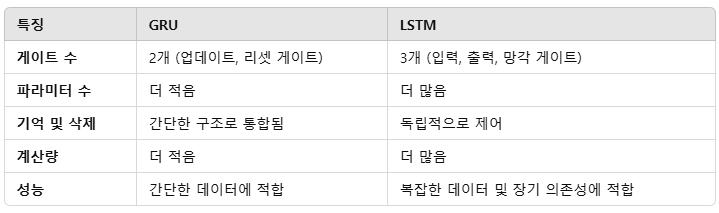

RMSProp: 딥러닝에서 사용되는 경사 하강법(SGD)의 업그레이드 버전으로, 학습을 더 빠르고 안정적으로 만드는 방법


<RMSProp의 핵심 아이디어>

각 변수마다 다른 학습률을 적용
→ 변화가 많은 변수는 학습률을 작게, 변화가 적은 변수는 학습률을 크게.

기울기의 크기를 활용
→ 기울기가 클수록 학습률을 작게 만들어서, 안정적으로 학습하도록 조정.

<작동 원리>

1.기울기를 관찰한다

모델이 잘못된 방향으로 이동한 정도(기울기)를 계산

2.기울기의 변화량을 저장한다

기울기의 크기를 기록하고, 이전 데이터와 합쳐서 평균을 낸다.
(너무 급격히 변하는 걸 막으려고 지수 이동 평균을 사용.)

3.학습률을 조정한다

기울기가 크면 학습률을 줄이고, 기울기가 작으면 학습률을 키운다

In [49]:
# TensorFlow/Keras에서 필요한 모듈 임포트
from tensorflow.keras.layers import Embedding, Dense, GRU  # Embedding, Dense, GRU 레이어
from tensorflow.keras.models import Sequential  # Sequential 모델
from tensorflow.keras.models import load_model  # 모델 저장 및 로드
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # 콜백 설정 (조기 종료, 모델 체크포인트)

# 임베딩 차원과 GRU의 은닉 상태 크기 정의
embedding_dim = 100  # 임베딩 벡터의 차원 (단어를 100차원 벡터로 변환)
hidden_units = 128  # GRU 레이어의 은닉 상태 크기

# Sequential 모델 생성
model = Sequential()

# Embedding 레이어 추가
# - vocab_size: 전체 단어 집합의 크기 (단어 인덱스의 개수)
# - embedding_dim: 단어를 변환할 임베딩 벡터의 차원
model.add(Embedding(vocab_size, embedding_dim))

# GRU 레이어 추가
# - hidden_units: GRU의 은닉 상태 크기
model.add(GRU(hidden_units))

# Dense 레이어 추가
# - 출력 노드: 1개 (이진 분류)
# - 활성화 함수: 'sigmoid' (출력값을 0~1 사이로 변환)
model.add(Dense(1, activation='sigmoid'))

# EarlyStopping 콜백 설정
# - val_loss(검증 손실)을 모니터링
# - 연속으로 4번(val_loss 개선 없음) 동안 학습 종료
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

# ModelCheckpoint 콜백 설정
# - val_acc(검증 정확도)를 모니터링
# - 가장 높은 val_acc를 가진 모델을 'best_model.keras' 파일로 저장
mc = ModelCheckpoint('best_model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

# 모델 컴파일
# - optimizer: 'rmsprop' (RMSProp 최적화 알고리즘)
# - loss: 'binary_crossentropy' (이진 분류를 위한 손실 함수)
# - metrics: 'acc' (정확도를 모니터링)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# 모델 학습
# - X_train: 학습 데이터 (숫자 시퀀스로 변환된 텍스트)
# - y_train: 학습 데이터의 레이블 (0 또는 1)
# - epochs: 15번 반복 학습
# - batch_size: 미니 배치 크기 (64)
# - validation_split: 학습 데이터의 20%를 검증 데이터로 사용
# - callbacks: EarlyStopping과 ModelCheckpoint 콜백을 사용
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - acc: 0.7066 - loss: 0.6562
Epoch 1: val_acc improved from -inf to 0.83019, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 254ms/step - acc: 0.7160 - loss: 0.6517 - val_acc: 0.8302 - val_loss: 0.5045
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - acc: 0.8524 - loss: 0.4487
Epoch 2: val_acc did not improve from 0.83019
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 337ms/step - acc: 0.8501 - loss: 0.4486 - val_acc: 0.8302 - val_loss: 0.4492
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - acc: 0.8196 - loss: 0.4263
Epoch 3: val_acc did not improve from 0.83019
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 421ms/step - acc: 0.8218 - loss: 0.4223 - val_acc: 0.8113 - val_loss: 0.4231
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - acc: 0.8722 - loss: 0.2845
Epoch 4: val_acc improved from 0.83019 to 0.86792, saving model to best_model.keras
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - acc: 0.8707 - loss: 0.2874 - val_acc: 0.8679 - val_loss: 0.3841
Epoch 5

In [50]:
loaded_model = load_model('best_model.keras')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.7924 - loss: 0.8694

 테스트 정확도: 0.8295


#3. 리뷰 예측해보기

In [58]:
import re

def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^a-zA-Z ]','', new_sentence)
  new_sentence = spacy_tokenize(new_sentence)
  new_sentence = [word for word in new_sentence if not word in stopwords]
  encoded = tokenizer.texts_to_sequences([new_sentence])
  pad_new = pad_sequences(encoded, maxlen = max_len)

  score = float(loaded_model.predict(pad_new))
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100))

In [109]:
import random

random.seed(12)

random_reviews = random.sample(list(total_data[['Review', 'label']].values), 6)

for review in random_reviews:
  print('review:',review)

review: ['Know I frequent 3 different Starbucks in my area, the closest one does not have a drive-through but the other 2 do so if I have my little kids with me I go to the drive-thrus. When I\'m by myself I used to go to the non-drive-thru store. Oxnard, CA and Port Hueneme, CA. Why is it every time one goes to any one of these Starbucks and orders something off their food menu, eight out of 10 times they\'re out of it... "Can I have the slow roasted ham and cheese?" Then the cashier says, "Oh wait, let me check and see if we have any... oh I\'m sorry, were out of that." And I say "How about the grilled cheese sandwich?" Then the same reply... "Sorry, we\'re out of that, too." Then I say, "Can you check to see if you still have any of the THE NEW beef sandwich on sourdough that you have pictures plastered all over place?" Guess what the reply is???'
 0]
review: ['The customer service is also great. Will make the coffee as you wish. Even willing to help you decide what you want or try 

In [110]:
for review in random_reviews:
  sentiment_predict(review[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
100.00% 확률로 부정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
83.65% 확률로 긍정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


<ipython-input-58-8e434bcc36b4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


99.99% 확률로 부정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
100.00% 확률로 부정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
99.96% 확률로 부정 리뷰입니다.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
99.82% 확률로 부정 리뷰입니다.


만들어 낸 것

In [111]:
sentiment_predict('The caramel macchiato I had today was absolutely perfect! The staff was so friendly, and the ambiance made it a great spot to catch up on work. I’ll definitely be coming back.')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
61.73% 확률로 긍정 리뷰입니다.


<ipython-input-58-8e434bcc36b4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))


In [112]:
sentiment_predict('My recent visit was quite disappointing. The coffee I ordered took too long to be served, and the taste was different from usual. While the staff seemed busy, the service felt lacking. The store was too noisy, and it was hard to find a seat, making it difficult to enjoy my time there.These are example reviews and can be adjusted further if needed!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
98.71% 확률로 부정 리뷰입니다.


<ipython-input-58-8e434bcc36b4>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(loaded_model.predict(pad_new))
